**Import the necessary libaries and data**

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\fobem\\OneDrive\\Desktop\\Bellvue Data Science Course\\5. Summer_Final\\DSC 680\\Project 2\\fraud_oracle.csv")
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,0


In [3]:
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
FraudFound_P                2
dtype: int

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

Remove PolicyNumber, Age due to duplication with cat variable, remove RepNumber, rename FraudFOund\_P with 'fraud'

In [5]:
df.rename(columns={'FraudFound_P':'fraud'},inplace=True)

In [6]:
df['fraud'].value_counts()

0    14497
1      923
Name: fraud, dtype: int64

In [7]:
df.drop(['PolicyNumber','Age','RepNumber','Year'],axis=1,inplace=True)

In [8]:
df.shape

(15420, 29)

**Exploratory Data Analysis**

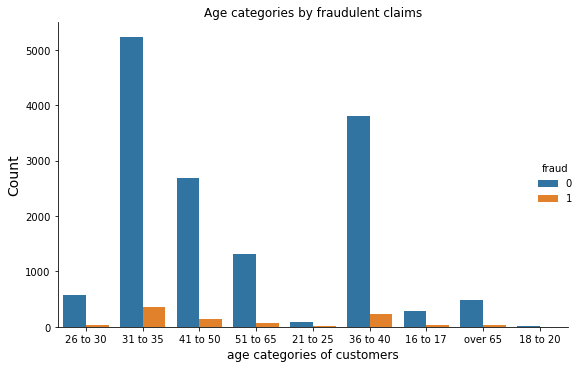

In [9]:
sns.catplot(x="AgeOfPolicyHolder",kind="count",hue="fraud",height=5,aspect=1.5,data=df)
plt.xlabel("age categories of customers",size=12)
plt.ylabel("Count",size=14)
plt.tight_layout()
plt.title("Age categories by fraudulent claims");

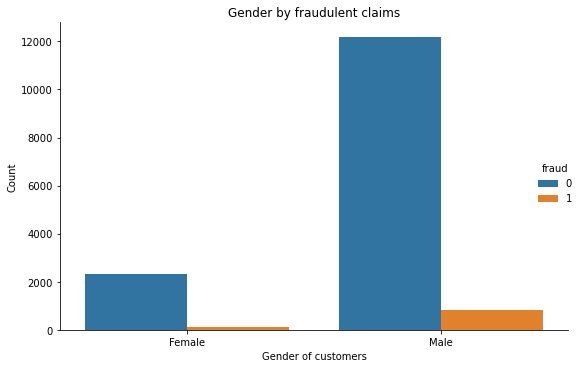

In [10]:
sns.catplot(x="Sex",kind="count",hue="fraud",height=5,aspect=1.5,data=df)
plt.xlabel("Gender of customers",size=10)
plt.ylabel("Count",size=10)
plt.tight_layout()
plt.title("Gender by fraudulent claims");

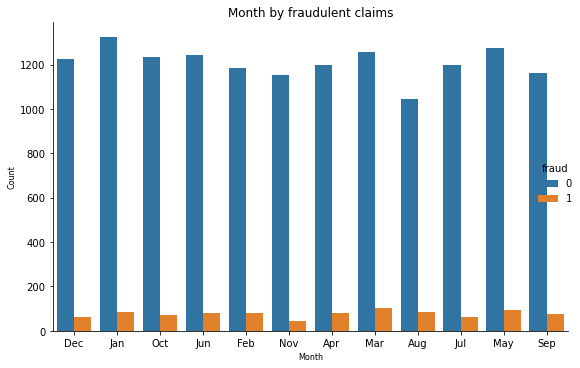

In [11]:
sns.catplot(x="Month",kind="count",hue="fraud",height=5,aspect=1.5,data=df)
plt.xlabel("Month",size=8)
plt.ylabel("Count",size=8)
plt.tight_layout()
plt.title("Month by fraudulent claims");

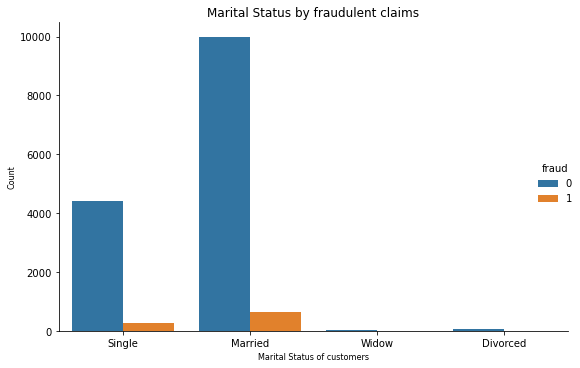

In [12]:
sns.catplot(x="MaritalStatus",kind="count",hue="fraud",height=5,aspect=1.5,data=df)
plt.xlabel("Marital Status of customers",size=8)
plt.ylabel("Count",size=8)
plt.tight_layout()
plt.title("Marital Status by fraudulent claims");

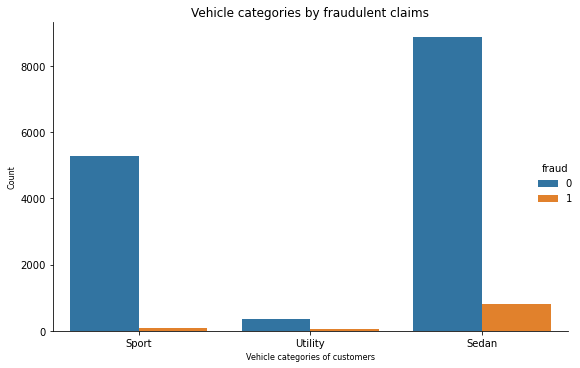

In [13]:
sns.catplot(x="VehicleCategory",kind="count",hue="fraud",height=5,aspect=1.5,data=df)
plt.xlabel("Vehicle categories of customers",size=8)
plt.ylabel("Count",size=8)
plt.tight_layout()
plt.title("Vehicle categories by fraudulent claims");

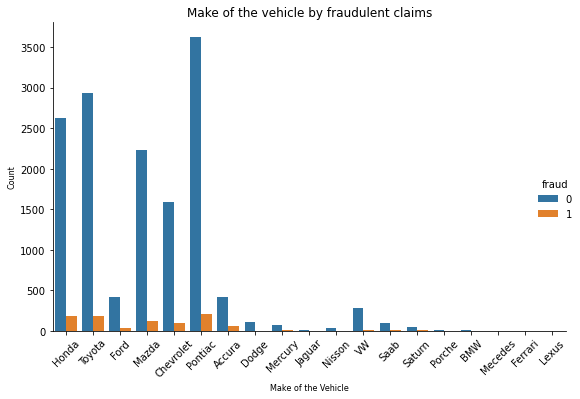

In [14]:
sns.catplot(x="Make",kind="count",hue="fraud",height=5,aspect=1.5,data=df)
plt.xlabel("Make of the Vehicle",size=8)
plt.ylabel("Count",size=8)
plt.tight_layout()
plt.xticks(rotation=45)
plt.title("Make of the vehicle by fraudulent claims");

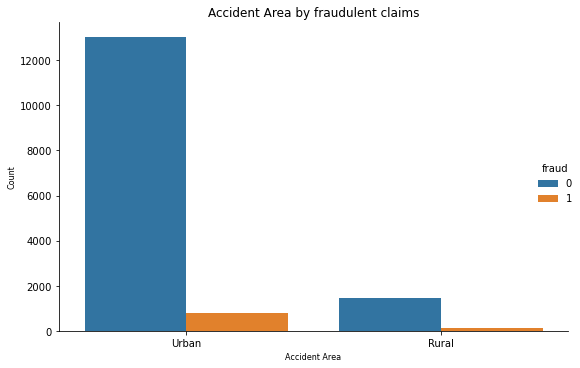

In [15]:
sns.catplot(x="AccidentArea",kind="count",hue="fraud",height=5,aspect=1.5,data=df)
plt.xlabel("Accident Area",size=8)
plt.ylabel("Count",size=8)
plt.tight_layout()
plt.title("Accident Area by fraudulent claims");

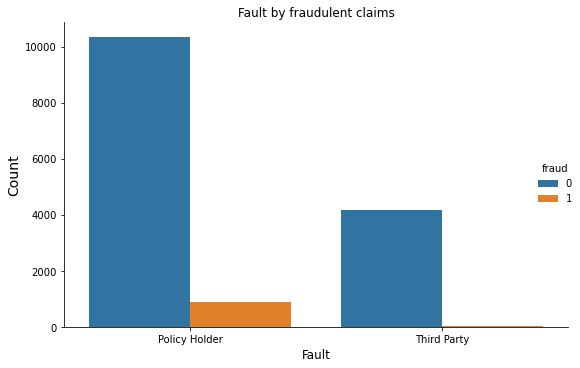

In [16]:
sns.catplot(x="Fault",kind="count",hue="fraud",height=5,aspect=1.5,data=df)
plt.xlabel("Fault",size=12)
plt.ylabel("Count",size=14)
plt.tight_layout()
plt.title("Fault by fraudulent claims");

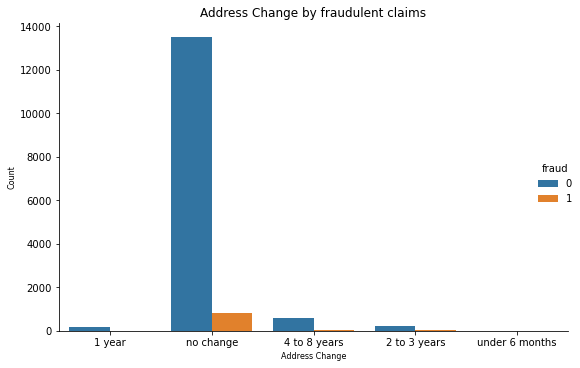

In [17]:
sns.catplot(x="AddressChange_Claim",kind="count",hue="fraud",height=5,aspect=1.5,data=df)
plt.xlabel("Address Change",size=8)
plt.ylabel("Count",size=8)
plt.tight_layout()
plt.title("Address Change by fraudulent claims");

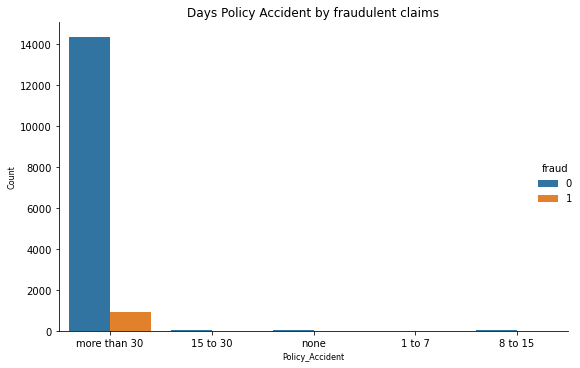

In [18]:
sns.catplot(x="Days_Policy_Accident",kind="count",hue="fraud",height=5,aspect=1.5,data=df)
plt.xlabel("Policy_Accident",size=8)
plt.ylabel("Count",size=8)
plt.tight_layout()
plt.title("Days Policy Accident by fraudulent claims");

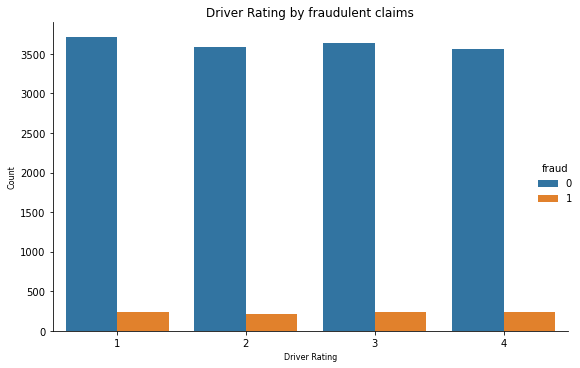

In [19]:
sns.catplot(x="DriverRating",kind="count",hue="fraud",height=5,aspect=1.5,data=df)
plt.xlabel("Driver Rating",size=8)
plt.ylabel("Count",size=8)
plt.tight_layout()
plt.title("Driver Rating by fraudulent claims");

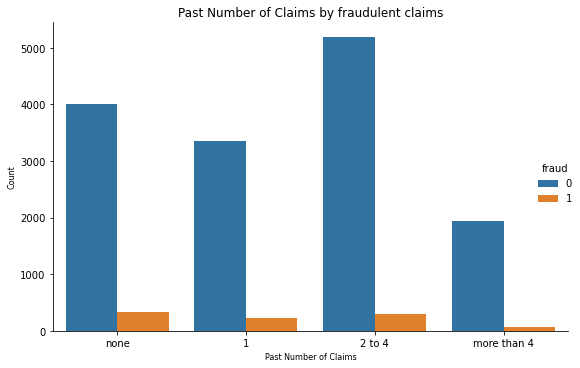

In [20]:
sns.catplot(x="PastNumberOfClaims",kind="count",hue="fraud",height=5,aspect=1.5,data=df)
plt.xlabel("Past Number of Claims",size=8)
plt.ylabel("Count",size=8)
plt.tight_layout()
plt.title("Past Number of Claims by fraudulent claims");

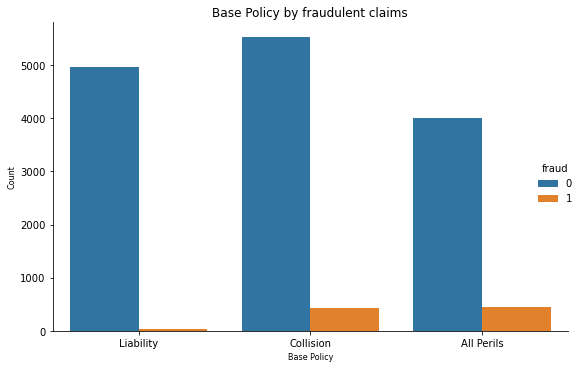

In [21]:
sns.catplot(x="BasePolicy",kind="count",hue="fraud",height=5,aspect=1.5,data=df)
plt.xlabel("Base Policy",size=8)
plt.ylabel("Count",size=8)
plt.tight_layout()
plt.title("Base Policy by fraudulent claims");

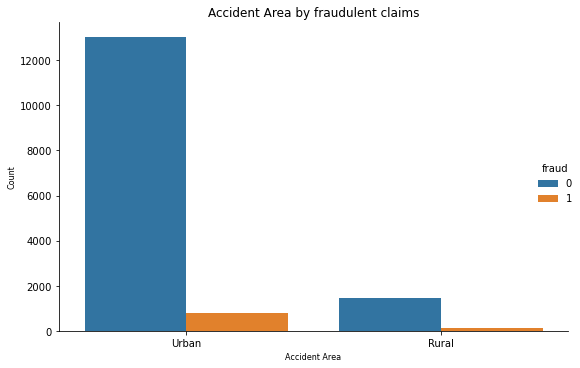

In [22]:
sns.catplot(x="AccidentArea",kind="count",hue="fraud",height=5,aspect=1.5,data=df)
plt.xlabel("Accident Area",size=8)
plt.ylabel("Count",size=8)
plt.tight_layout()
plt.title("Accident Area by fraudulent claims");


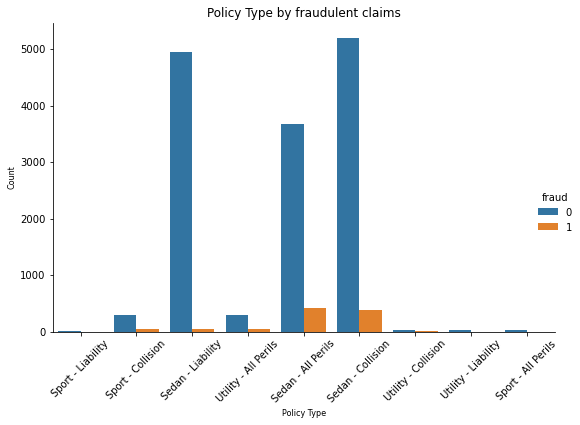

In [23]:
sns.catplot(x="PolicyType",kind="count",hue="fraud",height=5,aspect=1.5,data=df)
plt.xlabel("Policy Type",size=8)
plt.ylabel("Count",size=8)
plt.tight_layout()
plt.xticks(rotation=45)
plt.title("Policy Type by fraudulent claims");

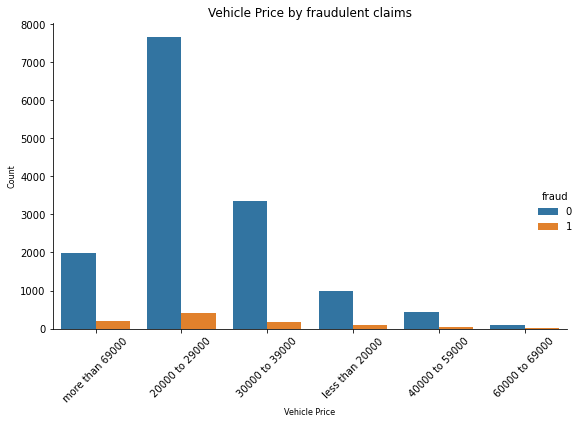

In [24]:
sns.catplot(x="VehiclePrice",kind="count",hue="fraud",height=5,aspect=1.5,data=df)
plt.xlabel("Vehicle Price",size=8)
plt.ylabel("Count",size=8)
plt.tight_layout()
plt.xticks(rotation=45)
plt.title("Vehicle Price by fraudulent claims");

**Convert the varibales to numeric values**

In [25]:
data = pd.get_dummies(df,drop_first=True)

In [26]:
data.head()

,WeekOfMonth,WeekOfMonthClaimed,Deductible,DriverRating,fraud,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
0,5,1,300,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,3,4,400,4,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,5,2,400,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,2,1,400,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5,2,400,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [27]:
data['fraud'].value_counts()

0    14497
1      923
Name: fraud, dtype: int64

In [28]:
df_corr = data.corr()['fraud'].sort_values(ascending=False)

In [29]:
df_corr.head(20)

fraud                                 1.000000
AddressChange_Claim_2 to 3 years      0.067467
PolicyType_Sport - Collision          0.050010
PastNumberOfClaims_none               0.047680
AddressChange_Claim_under 6 months    0.046863
VehiclePrice_more than 69000          0.046806
BasePolicy_Collision                  0.043860
VehiclePrice_less than 20000          0.039787
PolicyType_Utility - All Perils       0.038441
VehicleCategory_Utility               0.035815
AgeOfPolicyHolder_21 to 25            0.031258
Sex_Male                              0.029953
PolicyType_Sedan - Collision          0.028302
NumberOfSuppliments_none              0.027541
Days_Policy_Accident_none             0.026174
MonthClaimed_Aug                      0.025849
Month_Mar                             0.019853
Month_Aug                             0.017373
Deductible                            0.017348
AgeOfVehicle_new                      0.017212
Name: fraud, dtype: float64

In [30]:
df_corr.tail(20)

MonthClaimed_Jul                    -0.017514
AgeOfPolicyHolder_41 to 50          -0.017856
Make_VW                             -0.018208
NumberOfSuppliments_3 to 5          -0.019241
PastNumberOfClaims_2 to 4           -0.019597
Days_Policy_Accident_more than 30   -0.019842
AgeOfVehicle_more than 7            -0.020172
MonthClaimed_Dec                    -0.020425
AgentType_Internal                  -0.022978
NumberOfSuppliments_more than 5     -0.023000
VehiclePrice_30000 to 39000         -0.023727
Month_Nov                           -0.026409
MonthClaimed_Nov                    -0.030580
AccidentArea_Urban                  -0.033499
AddressChange_Claim_no change       -0.034467
PastNumberOfClaims_more than 4      -0.042476
Fault_Third Party                   -0.131389
VehicleCategory_Sport               -0.135903
PolicyType_Sedan - Liability        -0.153413
BasePolicy_Liability                -0.154007
Name: fraud, dtype: float64

Reduce the size of the majority class inline with the minority class

In [31]:
X = data.drop('fraud',axis=1)
y = data['fraud']

In [32]:
from imblearn.under_sampling import RandomUnderSampler

In [33]:
Undersample = RandomUnderSampler(sampling_strategy=0.87)
x_under,y_under = Undersample.fit_resample(X,y)

In [34]:
y_under.value_counts()

0    1060
1     923
Name: fraud, dtype: int64

**Split the data into train, test split**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(x_under,y_under,test_size=0.20,random_state=42)

**Import Pipeline packages and gridsearchcv**

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest,mutual_info_classif,chi2,f_classif,VarianceThreshold

In [38]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('var',VarianceThreshold(threshold=.75*(1-0.75))),
                 ('selector',SelectKBest()),
                 ('classifier',LogisticRegression())])

In [39]:
search_space = [{'classifier':[LogisticRegression()],
                 'classifier__penalty':['l1','l2'],
                 'classifier__C':np.logspace(0,4,10)},
                {'classifier':[KNeighborsClassifier()],
                 'classifier__n_neighbors':[3,5,8,11],
                 'classifier__weights':['uniform','distance']},
                {'classifier':[RandomForestClassifier()],
                 'classifier__n_estimators':[10,100,1000],
                 'classifier__max_features':[1,2,3]},
                 {'classifier':[SVC()],
                 'classifier__C':[0.0001,0.001,0.01,0.1,1.0,10,100,1000],
                 'classifier__gamma':[1,0.1,0.01,0.001,0.0001],
                 'classifier__kernel':['rbf']}]

In [40]:
model = GridSearchCV(pipe,search_space,cv=10,verbose=0)
model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('var',
                                        VarianceThreshold(threshold=0.1875)),
                                       ('selector', SelectKBest()),
                                       ('classifier', LogisticRegression())]),
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.6415...
                          'classifier__n_neighbors': [3, 5, 8, 11],
                          'classifier__weights': ['uniform', 'distance']},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_features': [1, 2, 3],
                          'classifier__n_estimators': [10, 100, 1000]},
                         {'classifier': [SVC(gamma=0.01)],
                          'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10,
                                            100, 1000],
                          'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'classifier__kernel': ['rbf']}])

In [41]:
best_est = model.best_estimator_
print(best_est)

Pipeline(steps=[('scaler', StandardScaler()),
                ('var', VarianceThreshold(threshold=0.1875)),
                ('selector', SelectKBest()), ('classifier', SVC(gamma=0.01))])


In [42]:
model.best_score_

0.7522052384364303

In [43]:
best_est.score(X_test,y_test)

0.7556675062972292

**Results**

The model recorded 75% accuracy on the trainning data while it recorded 76% on the test.  This clearly shows that the model did not overfit.

**Model Evaluation**

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,plot_roc_curve

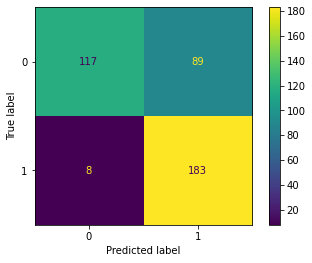

In [45]:
plot_confusion_matrix(model,X_test,y_test);

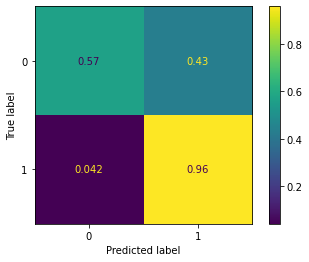

In [46]:
plot_confusion_matrix(model,X_test,y_test,normalize='true');

In [47]:
y_pred = model.predict(X_test)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71       206
           1       0.67      0.96      0.79       191

    accuracy                           0.76       397
   macro avg       0.80      0.76      0.75       397
weighted avg       0.81      0.76      0.75       397



The overal accuracy of the model was 76%.  The model did very well in classifying the fraudulent cases as 96% of them were correctly classified using Recall.

In [49]:
coef = model.best_estimator_.named_steps['classifier'].support_vectors_
importance = np.abs(coef)
importance

array([[0.4387268 , 1.31699763, 0.50963707, ..., 0.17855051, 1.20470484,
        0.51454134],
       [0.4387268 , 0.75930281, 0.50963707, ..., 0.17855051, 0.83007884,
        0.51454134],
       [0.4387268 , 0.75930281, 0.50963707, ..., 0.17855051, 0.83007884,
        0.51454134],
       ...,
       [0.4387268 , 0.75930281, 0.50963707, ..., 0.17855051, 0.83007884,
        0.51454134],
       [0.4387268 , 0.75930281, 0.50963707, ..., 0.17855051, 0.83007884,
        0.51454134],
       [0.4387268 , 0.75930281, 0.50963707, ..., 0.17855051, 0.83007884,
        0.51454134]])

In [50]:
imp = importance[0]
imp

array([0.4387268 , 1.31699763, 0.50963707, 0.5749234 , 0.35555654,
       0.68746571, 0.92817151, 0.17855051, 1.20470484, 0.51454134])

In [51]:
col_after_var = X_train.columns[best_est['var'].get_support()]
mask_sel = best_est['selector'].get_support(indices=True)
final_feature_cols = col_after_var[mask_sel]

In [52]:
SelectedFeatures = pd.Series(imp,final_feature_cols)

**Get the Feature Importance**

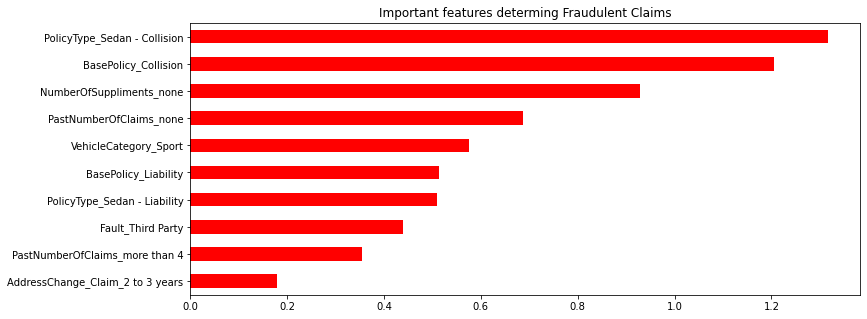

In [54]:
SelectedFeatures.sort_values().plot.barh(color='red',figsize=(12,5))
plt.title("Important features determing Fraudulent Claims");

The best ten features that predicted fraudulent claims are:

1. Past number of Claims = 0
2. Vehicle category = Sport
3. Base policy = Liability
4. Policy Type = Sedan
5. Fault = Third party
6. Vehicle price \> 69000
7. Month = March
8. Address Change = no change
9. Policy Type = Collision
10. Address change = 2 to 3 times.